In [27]:
%matplotlib  inline
import random
import torch
from d2l import torch as d2l

##### **生成数据集**

In [41]:
def synthetic_data(w, b, num_examples):
        X = torch.normal(0, 1, (num_examples, len(w)))                  # 1000个数，均值为0，标准差为1，行数为样本数，列数为特征数
        y = torch.matmul(X, w) + b                                      # y为x*w+b
        y += torch.normal(0, 0.01, y.shape)                             # 误差𝜖均值为0，标准差为0.01，非常接近0 形状和y相同
        return X, y.reshape((-1, 1))                                    # reshape(-1)表示行数由pytorch自己定，列数为1

##### **以下为实验**

In [42]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)                 # 线性模型参数 𝐰=[2,−3.4]⊤、 𝑏=4.2

In [43]:
print('features:', features[0], '\nlabel:', labels[0])
print()

features: tensor([-0.1270,  1.4471]) 
label: tensor([-0.9741])



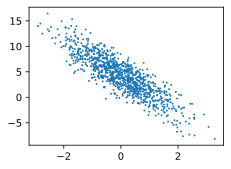

In [44]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1)    # 画出特征的第一列，和y的图，有相关性，detach分离梯度，转到numpy内绘图

##### **实验结束**
##### **读取数据集**

In [45]:
def data_iter(batch_size, features, labels):        # 打乱数据，进行批量访问
    num_examples = len(features)
    indices = list(range(num_examples))             # 将数据写入列表中
    random.shuffle(indices)                         # shuffle函数打乱这些样本
    for i in range(0, num_examples, batch_size):    #从0到num_examples每次跳batch size个大小
        batch_indices = torch.tensor(indices[i:min(i + batch_size, num_examples)])      #每次选取batchsize个，如果没拿满就取这两者最小值
        yield features[batch_indices], labels[batch_indices]            #yield就是return一个值，并记住位置，下次从这里开始，

In [46]:
batch_size = 10

for  X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break


tensor([[ 0.9364,  0.6295],
        [-0.5707,  0.0833],
        [ 0.1169,  0.5449],
        [ 0.1780, -1.1164],
        [ 0.4139,  0.4321],
        [ 1.8200,  0.2351],
        [-0.1246, -0.6788],
        [ 0.8857, -1.7509],
        [-1.0959,  0.5548],
        [ 0.8547, -0.6901]]) 
 tensor([[ 3.9327],
        [ 2.7753],
        [ 2.5811],
        [ 8.3518],
        [ 3.5586],
        [ 7.0405],
        [ 6.2587],
        [11.9244],
        [ 0.1218],
        [ 8.2559]])


##### **初始化w，b**

In [47]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

##### **定义模型**

In [48]:
def linreg(X, w, b):
    return torch.matmul(X, w) +b

##### **定义损失函数**

In [49]:
def squared_loss(y_hat, y):
    return(y_hat - y.reshape(y_hat.shape)) **2 /2       #将真实值y转变为和预测值相同形状

##### **定义优化算法**

In [50]:
def sgd(params, lr, batch_size):            # 参数，学习率，batch size
    with torch.no_grad():                   # 
        for param in params:
            param -= lr * param.grad / batch_size   # 学习率乘参数， .grad 自动求导算梯度， loss计算的是一个批量样本和，在这里除掉批量大小，得到一个loss大小
            param.grad.zero_()              # 梯度设成0

In [51]:
lr = 0.03
num_epochs = 3
net = linreg            
loss = squared_loss

In [52]:
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features,labels):         # 每次选取一个批量做预测
        l = loss(net(X, w, b),y)                                # 算出损失loss
        l.sum().backward()                                      # 求和之后算梯度，反向传播算法一定要是一个标量才能进行计算。
        sgd([w, b], lr, batch_size)                             # 用sgd对w，b进行更新
    with torch.no_grad():
        train_1 = loss(net(features, w, b), labels)             # 一个epoch做完整个计算损失
        print(f'epoch{epoch + 1}, loss {float(train_1.mean()):f}')          #‘f’ 用标准形式输出一个浮点数

epoch1, loss 0.038238
epoch2, loss 0.000091
epoch3, loss 0.000000


In [53]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([ 0.0003, -0.0004], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0004], grad_fn=<RsubBackward1>)
